In [ ]:

# import the relevant library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re
import nltk


nltk.download(["stopwords",
               "punkt",
               "wordnet",
               "omw-1.4",
               "vader_lexicon"
               ])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
!pip install summarytools

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 19.9 MB/s eta 0:00:00


In [ ]:

# load dataset

file_path = "/content/amazon_alexa.tsv"

df = pd.read_csv(file_path, sep='\t')


df

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1
...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1


In [ ]:


from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer

import nltk
nltk.download('wordnet')
nltk.download('stopwords')


# Define the stop words set
stop_words =set(stopwords.words('english'))

def preprocess_text(text):
    # Tokenize
    tokenized_document = nltk.tokenize.RegexpTokenizer("[a-zA-Z0-9']+").tokenize(text)

    # Remove stopwords
    cleaned_tokens = [word.lower() for word in tokenized_document if word.lower() not in stop_words]

    lemmatizer = WordNetLemmatizer()
    lemmatized_text = [lemmatizer.lemmatize(word) for word in cleaned_tokens]
    return lemmatized_text



[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:

df2 = df[["verified_reviews", "feedback"]]
df2

,verified_reviews,feedback
0,Love my Echo!,1
1,Loved it!,1
2,"Sometimes while playing a game, you can answer...",1
3,I have had a lot of fun with this thing. My 4 ...,1
4,Music,1
...,...,...
3145,"Perfect for kids, adults and everyone in betwe...",1
3146,"Listening to music, searching locations, check...",1
3147,"I do love these things, i have them running my...",1
3148,Only complaint I have is that the sound qualit...,1


In [ ]:

from summarytools import dfSummary
#implement summary tools
dfSummary(df2)


No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,verified_reviews[object],1. 2. Love it!3. Love it4. Great product5. Great6. Works great!7. I love it8. love it9. I like it10. Easy to set up.11. other,"79 (2.5%)22 (0.7%)19 (0.6%)11 (0.3%)9 (0.3%)8 (0.3%)7 (0.2%)5 (0.2%)5 (0.2%)4 (0.1%)2,981 (94.6%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy81sbWrAAAACXBIWXMAAA9hAAAPYQGoP6dpAAAD/ElEQVR4nO3cQWpbZxiG0e8a4cYTCSHwEto9eBFZbBahRXQPxugOYtcTdVAHMmiSQuNHVD1nErA8+AcP+iVz3yzn83mgcHPpA/D/ITYyYiMjNjJiIyM2MmIjIzYyYiOzzMzdzNx+9bPX8/n8fKHzcMU2h8Ph43a73X/5wbquT8uyfBIcP9tmu93uHx4enne73cvpdPpwPB73j4+PtzMjNn6qzczMbrd7ub+///z2s7sLnocr5gsCGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGR2czMnE6nD1//C+9hs67r0/F43M/bc2zruj7NzOtlj8U1skEgs/gvs6h8eWcb72a8t83hcPg4M2NRxXu72W63+7cp3+0Pfxv+BX9nIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjs3kbuMwYufDOPBZOxuCFjHc2MgYvZAxeyPjTBxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGYMXMh4LJ2PwQsZnNjKuUTLWVWSsq8j4zEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERsa6iozHwslYV5HxmY3MzbIsvy3L8uHSB+H63czMrzPzy6UPwvVzjZIRGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkbmZmd9n5o9LH4TrZ4NAxjVKRmxkDF7IGLyQcY2SERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxnrKjLWVWRco2TERsa6iox1FRnXKBmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGYMXMgYvZFyjZMRGxuCFjMELGdcoGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZgxcyBi9kXKNkxEZGbGSsq8hYV5FxjZIRGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkbGuImNdRcY1SkZsZAxeyBi8kHGNkhEbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRMXghY/BCxjVKZpmZu5m5vfRBuAqv5/P5+Vsvbg6Hw8ftdrsvT8R1Wtf1aVmWT98KbrPdbvcPDw/Pu93upT4c1+N0On04Ho/7x8fH25n5+9hmZna73cv9/f3n9HRco7vvvegLAhmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERG5nNzF+Ph1z6IPy3/ZOGNuu6Ph2Px/384PEQ+JF1XZ9m5vVbr3ssnJ/pu4+FW1eR8QWBjNjIiI2M2MiIjYzYyIiNjNjIiI3MnyGPzsoXnV2fAAAAAElFTkSuQmCC"">",1(0.0%)
2,feedback[int64],1. 12. 0,"2,893 (91.8%)257 (8.2%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAAuCAYAAAA/ZmtKAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy81sbWrAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABM0lEQVR4nO3bMWrDQBCF4dkgTNzsIgQ6jA6Rw+YQexshtEVs3GyKtCkyA3rGyv/1gil+BDZ6qfdugEIys6uZXZ59CF7Oo/d+8zwwTNP0kXMej7oI59Ra21JKn57ghpzzuCzLrZRyP/I4nMe+7++11nFd14uZ/T02M7NSyn2e56/DrsMZXb0PvB1xBfAbYoMMsUGG2CBDbJAhNsgQG2SIDTLEBhligwyxQYbYIENskCE2yBAbZAazn4/hnn0IXke0l6G1ttVaRwt8DIf/q7W2mdnD8wyDF0S5By+JKR9Uom82d9VAaMoXmXEB7ilfdMYFRKd8/HKFG3/qQobYIENskCE2yBAbZIgNMsQGGWKDDLFBhtggQ2yQITbIEBtkiA0yxAYZ95SP2R+iQlO+yIwLYPACmW8KW2rf8Qi7kAAAAABJRU5ErkJggg=="">",0(0.0%)


In [ ]:
 # Drop rows with missing or empty/whitespace-only reviews
df2 = df2[~df2['verified_reviews'].str.strip().isna()]
df2


,verified_reviews,feedback
0,Love my Echo!,1
1,Loved it!,1
2,"Sometimes while playing a game, you can answer...",1
3,I have had a lot of fun with this thing. My 4 ...,1
4,Music,1
...,...,...
3145,"Perfect for kids, adults and everyone in betwe...",1
3146,"Listening to music, searching locations, check...",1
3147,"I do love these things, i have them running my...",1
3148,Only complaint I have is that the sound qualit...,1


In [ ]:
import pandas as pd

# Drop duplicates across all columns and keep the first occurrence
df2.drop_duplicates(keep='first', inplace=True)

# Reset the index after dropping duplicates
df2.reset_index(drop=True, inplace=True)

# Print the shape of the DataFrame after dropping duplicates
print(f"Shape of DataFrame after dropping duplicates: {df2.shape}")

Shape of DataFrame after dropping duplicates: (2301, 2)


<ipython-input-8-a043552512f0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop_duplicates(keep='first', inplace=True)


In [ ]:
#count the class label
df2["feedback"].value_counts()


,count
feedback,
1,2095
0,206


<Axes: xlabel='feedback', ylabel='count'>

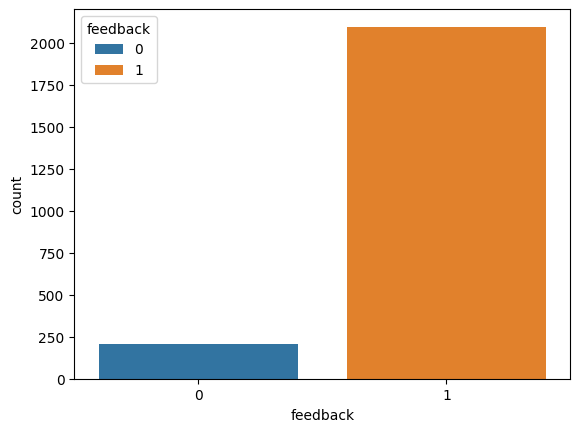

In [ ]:

#plot the graph
sns.countplot(x="feedback", data=df2, hue="feedback")

In [ ]:

df2["verified_reviews"] = df2["verified_reviews"].apply(preprocess_text)
df2.head()

<ipython-input-11-a2f34068c931>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["verified_reviews"] = df2["verified_reviews"].apply(preprocess_text)


,verified_reviews,feedback
0,"[love, echo]",1
1,[loved],1
2,"[sometimes, playing, game, answer, question, c...",1
3,"[lot, fun, thing, 4, yr, old, learns, dinosaur...",1
4,[music],1


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialize CountVectorizer
vectorizer = CountVectorizer()

# Transform the processed_review column in df2 (already a string)
X = vectorizer.fit_transform(df2["verified_reviews"].map(" ".join))

# Convert the sparse matrix to a DataFrame
X = pd.DataFrame(X.toarray())

# Display X
X.head()



,0,1,2,3,4,5,6,7,8,9,...,3553,3554,3555,3556,3557,3558,3559,3560,3561,3562
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
Y = df2["feedback"]

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=42, stratify=Y)

In [ ]:

!pip install imblearn

In [ ]:
from imblearn.over_sampling import ADASYN

# Initialize ADASYN
resampler = ADASYN(random_state=42)

# Apply ADASYN to resample the training data
x_train_ada, y_train_ada = resampler.fit_resample(x_train, y_train)


<Axes: xlabel='feedback', ylabel='count'>

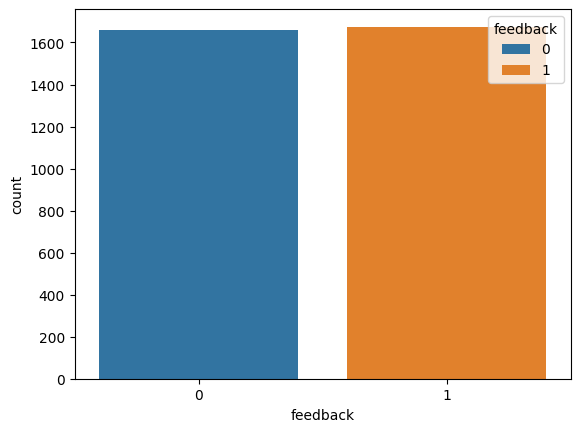

In [ ]:
sns.countplot(x=y_train_ada, hue = y_train_ada)

In [ ]:
from sklearn.naive_bayes import MultinomialNB



model = MultinomialNB()
model.fit(x_train_ada, y_train_ada)



MultinomialNB()

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
#model evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import metrics
print(f"Accuracy Score: {accuracy_score(y_test, y_pred) * 100:.2f}%")
cm = metrics.confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm, "\n\n")
print("-------------------------------------------------------------------------")
result = metrics.classification_report(y_test, y_pred)
print("Classification Report:\n")
print(result)


Accuracy Score: 89.15%
Confusion Matrix:
[[ 19  22]
 [ 28 392]] 


-------------------------------------------------------------------------
Classification Report:

              precision    recall  f1-score   support

           0       0.40      0.46      0.43        41
           1       0.95      0.93      0.94       420

    accuracy                           0.89       461
   macro avg       0.68      0.70      0.69       461
weighted avg       0.90      0.89      0.89       461



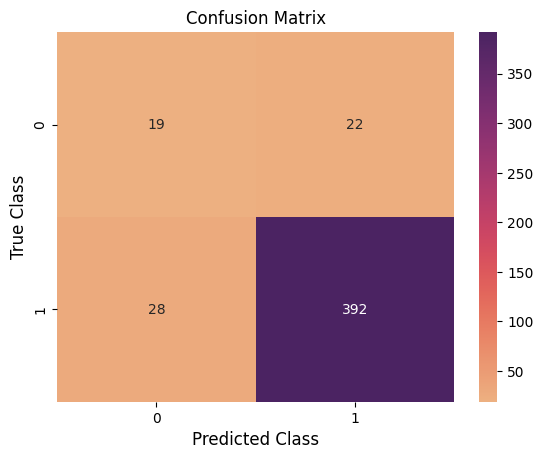

In [ ]:
ax = sns.heatmap(cm, cmap='flare',annot=True, fmt='d')
plt.xlabel("Predicted Class",fontsize=12)
plt.ylabel("True Class",fontsize=12)
plt.title("Confusion Matrix",fontsize=12)
plt.show()

# Sentiment Analysis

In [ ]:
pip install vaderSentiment


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.3 MB/s eta 0:00:00


In [ ]:
dfSummary(df)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,rating[int64],1. 52. 43. 14. 35. 2,"2,286 (72.6%)455 (14.4%)161 (5.1%)152 (4.8%)96 (3.0%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAABzCAYAAACPdnBjAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy81sbWrAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACT0lEQVR4nO3bTWrbQACG4VExodlIGIMP40P0sD2EbmOMtWhCNuqii1IS/8SMPmXo85xgwC8yEvN18zwXSPi29gH4f4iNGLER05VSnkspT2sfhIe9zfP8svYh7rHZ7XY/+r7frn0QHjNN06nrup8tBLfp+357OBxehmF4XfswfM75fP4+juP2eDw+lVK+fmyllDIMw+t+v/+19mF4yPPaB7iXFwRixEaM2IgRGzFiI0ZsxIiNGLERIzZixEaM2IgRGzFiI2ZTyp+rKmsfhM9r7XfbTNN0GsdxWxq6qsJf0zSdSilva5/jHq6Ft6+Za+Gd3SgpXhCIWfJvtJnHOxmLrataWv2Qsci6qrXVDxlLrqt8SuEfXhCIERsxYiNGbMSIjRixESM2YsRGjNiIERsxYiNGbMSIjZhF1lWtrX7IWGxd1dLqhwzXwomxriLGCwIx9/yN+jukipvrKisparm6rrKSoqZ71lVWUlThBYEYsREjNmLERozYiBEbMWIjRmzEiI0YsREjNmLERozYiLm6rrKSoqab6yorKWpxLZwY6ypibj3ZPNWo5urgxdiFmi4OXoxdqO3W4MXYhWp81CVGbMSIjRixESM2YsRGjNiIERsxYiNGbMSIjRixESM2YsRGzMV1lWUVtV1dV1lWUZMNAjHWVcRcerJ5olHdh+sqqyqW8G5dZVXFUi6tq6yqqM5HXWLERozYiBEbMWIjRmzEiI0YsREjNmLERozYiBEbMWIjRmzEvFtXWVWxlA/XVVZVLMEGgRjrKmK8IBAjNmJ+A1L8DjfBj2/8AAAAAElFTkSuQmCC"">",0(0.0%)
2,date[object],1. 30-Jul-182. 29-Jul-183. 28-Jul-184. 26-Jul-185. 31-Jul-186. 25-Jul-187. 19-Jul-188. 27-Jul-189. 20-Jul-1810. 21-Jul-1811. other,"1,603 (50.9%)482 (15.3%)250 (7.9%)85 (2.7%)81 (2.6%)43 (1.4%)38 (1.2%)38 (1.2%)28 (0.9%)26 (0.8%)476 (15.1%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy81sbWrAAAACXBIWXMAAA9hAAAPYQGoP6dpAAAEWUlEQVR4nO3dTW4TaRhG0TeRRXcmtixLWQYLyCJYbC/CC2AfUZQaEJpJesCPQDDAgbqW6XMWYJXQpUyVvgdfPT8/DxSuz30B/H+IjYzYyIiNjNjIiI2M2MiIjYzYyFzNzM3MvDr3hVyoD8/Pz0/nvohLsTkcDm+22+3+3BdyiZZlebi6uvpHcD9ns91u93d3d0+73e79uS/mkjw+Pv59PB739/f3r2ZGbD9hMzOz2+3e397evjv3xVygm3NfwCXxgEBGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGQ2Mx/PZp37Qi6NP7PTbZZleTgej/txNutky7I8zMyHc1/HpbBB+DU2CCe48l9mUSnubP72MzPBusoCic9WXVdZIPG1Yl3lKZeZ8VKXkNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNzKqDF6MQvrb64MUohM8cCydj8ELmJXc2dype5OTBiwELL3XS4MWAhV/xksGLAQsv4qUuGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbmZMGLwYs/IqTBy8GLLyUY+FkDF7IeEAg86OvUV+TrOK7dZX1FGv5Zl1lPcWafrSusp5iFR4QyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyHyzrrKeYk3frausp1iLY+FkrKvIuLORMXghY/BCxuCFjJe6ZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZAxeyBi8kHEsnIzBC5mv72zuaKzqy+DF0IW1XW+32/3r16/n08LqlJ+ChJNcz8zc3Nz8e+4L4c/npS4ZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZG5npl5enr669wXwp/velmWh7dv31pVsTobBDLWVWTc2chYV5GxriJjXUXGS10yYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyBi9kDF7IOBZOxuCFjDsbGYMXMgYvZAxeyHipS0ZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERsbghYzBCxnHwskYvJDxgEDm89fo+AplbZvD4fBmZsayirVdb7fbvWUVBf9mIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjs/m0qpqxrGJljoWTsa4i485GxuCFjMELGa8+yIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIGLyQcSycjMELma9/KG0NfnyNLzaHw+HNpw3Cb7csy4MhDZ9tttvt/u7u7mm3273/nR/8+Pj49/F43N/f37+aGbExm5mZ3W73/vb29t0Kn3+zwmdyobxnIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiI7OZ+Xgc6Hd/8BqfyWXbLMvycDwe97PCcaBPYxpDGmbGsXBCBi9kPCCQERsZsZERGxmxkREbGbGRERsZsZH5D1+G4ca1PzTsAAAAAElFTkSuQmCC"">",0(0.0%)
3,variation[object],1. Black Dot2. Charcoal Fabric 3. Configuration: Fire TV Stick4. Black Plus5. Black Show6. Black7. Black Spot8. White Dot9. Heather Gray Fabric 10. White Spot11. other,516 (16.4%)430 (13.7%)350 (11.1%)270 (8.6%)265 (8.4%)261 (8.3%)241 (7.7%)184 (5.8%)157 (5.0%)109 (3.5%)367 (11.7%),"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy81sbWrAAAACXBIWXMAAA9hAAAPYQGoP6dpAAAEJElEQVR4nO3dQW7bVgBFUaowgmYiwTDgxXgRXWwXod0YhjVogkzUQYe2xS+KvKnhcxZgZnDxBRJ84e58Pk9Q+ON3/wP4OsRGRmxkxEZGbGTERkZsZMRGRmxkdtM0fZ+m6dvG1/l1Pp9/bHwN/ufuHh4e/trv9/dbXuR0Or3sdru/Bfe13e33+/unp6cfh8Ph5xYXeH19/fN4PN4/Pz9/m6ZJbF/Y3TRN0+Fw+Pn4+PjPhtf5vuHf5pNwg0BGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTupum/d862usCWf5vP5e50

In [ ]:
# Define a regex pattern for uninformative reviews
pattern = r'^[^\w]*$|^\w{1}$'

# Use regex to find short or symbol-only reviews
invalid_reviews = df[df['verified_reviews'].str.match(pattern, na=False)]

invalid_reviews


,rating,date,variation,verified_reviews,feedback
60,5,30-Jul-18,Heather Gray Fabric,😍,1
85,5,30-Jul-18,Heather Gray Fabric,,1
183,3,29-Jul-18,Heather Gray Fabric,,1
219,5,29-Jul-18,Sandstone Fabric,,1
374,1,26-Jul-18,Black,,0
...,...,...,...,...,...
3114,3,30-Jul-18,Black Dot,,1
3120,5,30-Jul-18,Black Dot,,1
3123,4,30-Jul-18,Black Dot,,1
3126,5,30-Jul-18,Black Dot,,1


In [ ]:

# Remove rows with uninformative reviews directly
df_cleaned = df.loc[~df['verified_reviews'].str.match(pattern, na=False)]

# Drop rows with missing or empty/whitespace-only reviews
df_cleaned = df_cleaned[~df_cleaned['verified_reviews'].str.strip().isna()]

# Drop duplicates across all columns and keep the first occurrence
df_cleaned.drop_duplicates(keep='first', inplace=True)

# Reset the index after dropping duplicates
df_cleaned.reset_index(drop=True, inplace=True)


In [ ]:
dfSummary(df_cleaned)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,rating[int64],1. 52. 43. 14. 35. 2,"1,729 (72.6%)340 (14.3%)129 (5.4%)106 (4.5%)76 (3.2%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAABzCAYAAACPdnBjAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy81sbWrAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACT0lEQVR4nO3bQWrbQACF4VExodlIGIMP40P0sD2EbmOMtUhCNuqiq+LYct3RU5R+3wkG/CMjMa8Zx7FAwrelD8D/Q2zEiI2YppTyXEp5Wvog/JP3cRxflz7ElM1ut/vRtu126YPwuGEYTk3T/PzswW3att0eDofXruvelj4Mf+98Pn/v+357PB6fSimfO7ZSSum67m2/378sfRge9rz0Ae7hBYEYsREjNmLERozYiBEbMWIjRmzEiI0YsREjNmLERozYiNmU8vuaytIH4TFr+u02wzCc+r7flpVcU+HSMAynUsr70ueY4lr417CKa+GN3SgpXhCImfNvdBWPdnJmW1etZfFDzizrqjUtfsiZc13lUwp/8IJAjNiIERsxYiNGbMSIjRixESM2YsRGjNiIERsxYiNGbMTMsq5a0+KHnNnWVWtZ/JDjWjgx1lXEeEEg5p6/UX+HVDG5rrKSopab6yorKWq6Z11lJUUVXhCIERsxYiNGbMSIjRixESM2YsRGjNiIERsxYiNGbMSIjZib6yorKWqaXFdZSVGLa+HEWFcRM/Vk81SjmpuDF2MXaro6eDF2obapwYuxC9X4qEuM2IgRGzFiI0ZsxIiNGLERIzZixEaM2IgRGzFiI0ZsxIiNmKvrKssqaru5rrKsoiYbBGKsq4i59mTzRKO6D9dVVlXM4WJdZVXFXK6tq6yqqM5HXWLERozYiBEbMWIjRmzEiI0YsREjNmLERozYiBEbMWIjRmzEXKyrrKqYy4frKqsq5mCDQIx1FTFeEIgRGzG/AMcxDjeD6qpsAAAAAElFTkSuQmCC"">",0(0.0%)
2,date[object],1. 30-Jul-182. 29-Jul-183. 28-Jul-184. 26-Jul-185. 31-Jul-186. 25-Jul-187. 27-Jul-188. 19-Jul-189. 20-Jul-1810. 21-Jul-1811. other,"1,051 (44.2%)321 (13.5%)230 (9.7%)84 (3.5%)65 (2.7%)42 (1.8%)38 (1.6%)35 (1.5%)27 (1.1%)25 (1.1%)462 (19.4%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy81sbWrAAAACXBIWXMAAA9hAAAPYQGoP6dpAAAEa0lEQVR4nO3dQU5bVwCG0Quy0jCxZUViGVmAF9HFdhFeQPaBEB7ENBM6SBolNVQhcL+H4JxZRn5Cny7y0/3D2d3d3YDC+dIPwNshNjJiIyM2MmIjIzYyYiMjNjJiI3M2xrgYY7xb+kFekC93d3fHpR/iNVp9+PDhz/V6vV36QV6Kw+FwfXZ29pfgnt9qvV5vd7vdcbPZ3C79MEu7ubl5v9/vt1dXV+/GGGJ7ZqsxxthsNreXl5efl36YF+Ji6Qd4rXxBICM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2Mqsxvt7jWvpBXgI/h7lWh8Pher/fb4d7XGOMrzd1xxhfln6O18gG4ZQNwiRn/sssKrNONqcDJ6asqyyUuM+zr6sslHjIrHWVb7ac8FKXjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNzLMPXoxGeMiUwYvRCPdxLZyMwQuZp55sTjB+2ZMGL4YtPMZvD14MW3ispw5eDFv4ZV7qkhEbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkfntwYthC4/1pMGLYQuP4Vo4GYMXMr4gkHno16hfjzy7e9dVVlPMcLKusppilofWVVZTPDtfEMiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MicrKusppjl3nWV1RQzuBZOxrqKzH0nm1ONKU4GL8YuzPLT4MXYhZnuG7wYuzCFl7pkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkfhq8GLsw08ngxdiFWVwLJ2PwQua/J5tTjWl+GrwYuzDT+b+Dl91ud/wW3e/+OUj4X98HL9/+bezCNF7qkhEbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbmZM/JwSz/LiusqxiKhsEMtZVZH482ZxqTPV9XWVZxWzn6/V6+/Hjx2FZxWznY4xxcXHx99IPwuvnpS4ZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERuZ8zHGOB6Pfyz9ILx+54fD4frTp0/GLkznWjgZgxcyTjYyBi9kDF7IGLyQ8VKXjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjMELGYMXMq6FkzF4IeMLAhm/RslYV5GxriJjXUXGFwQyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYy1lVkrKvIuBZOxrqKjJONjMELGYMXMgYvZLzUJSM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiI2PwQsbghYxr4WQMXsj8eLLVnKRvzPfBS/3BBjZvz2q9Xm93u91xs9ncVh96c3Pzfr/fb6+urt6NMcT2RqzGGGOz2dxeXl5+jj/7Iv48FualLhmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERG5nVGF+v/JQfWn8eL8PqcDhc7/f77Yiv/BjYvD2uhZMxeCHjCwIZsZERGxmxkREbGbGRERsZsZERG5l/AJjnBhdAXGkPAAAAAElFTkSuQmCC"">",0(0.0%)
3,variation[object],1. Configuration: Fire TV Stick2. Black Plus3. Black4. Black Show5. Black Dot6. Black Spot7. Charcoal Fabric 8. White Spot9. White Dot10. White11. other,334 (14.0%)261 (11.0%)258 (10.8%)255 (10.7%)247 (10.4%)235 (9.9%)219 (9.2%)104 (4.4%)90 (3.8%)87 (3.7%)290 (12.2%),"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy81sbWrAAAACXBIWXMAAA9hAAAPYQGoP6dpAAAEDElEQVR4nO3dTWocVwBG0ddBmHjSjRBoMV5EFptF9G6EUA9i40lnEDJT/1TV0zVKzllA4cHlNVW8T96dz+cBhd9+9T+A/w+xkREbGbGRERsZsZERGxmxkREbmd0Y4+sY48sHPPvn+Xz+/gHP5ZN6eHp6+mO/3z/OfvDpdHrd7XZ/Co5/Pez3+8dv3759PxwOP2Y99O3t7ffj8fj48vLyZYwhNsYYYzyMMcbhcPjx/Pz81+Rnf538PD45LwhkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEbmYYx/7p/NfOj

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

#instantiate sentiment analysis
sentiment_analysis = SentimentIntensityAnalyzer()

df_cleaned["compound"] = [sentiment_analysis.polarity_scores(course_reviews)["compound"] for course_reviews in df_cleaned["verified_reviews"]]
df_cleaned["negative"] = [sentiment_analysis.polarity_scores(course_reviews)["neg"] for course_reviews in df_cleaned["verified_reviews"]]
df_cleaned["positive"] = [sentiment_analysis.polarity_scores(course_reviews)["neu"] for course_reviews in df_cleaned["verified_reviews"]]
df_cleaned["neutral"] = [sentiment_analysis.polarity_scores(course_reviews)["pos"] for course_reviews in df_cleaned["verified_reviews"]]

In [ ]:
df_cleaned.head()

,rating,date,variation,verified_reviews,feedback,compound,negative,positive,neutral
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,0.6696,0.000,0.308,0.692
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,0.6360,0.000,0.193,0.807
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,-0.1280,0.102,0.784,0.114
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,0.9169,0.000,0.617,0.383
4,5,31-Jul-18,Charcoal Fabric,Music,1,0.0000,0.000,1.000,0.000


In [ ]:
df_cleaned[["compound", "negative", "positive", "neutral"]].describe()

,compound,negative,positive,neutral
count,2380.000000,2380.000000,2380.000000,2380.000000
mean,0.538838,0.032893,0.634663,0.332443
std,0.394490,0.082029,0.239991,0.251162
min,-0.991000,0.000000,0.000000,0.000000
25%,0.394375,0.000000,0.492750,0.144000
50%,0.640750,0.000000,0.679000,0.289000
75%,0.836000,0.033250,0.805000,0.483000
max,0.997900,1.000000,1.000000,1.000000


<Axes: xlabel='compound', ylabel='Count'>

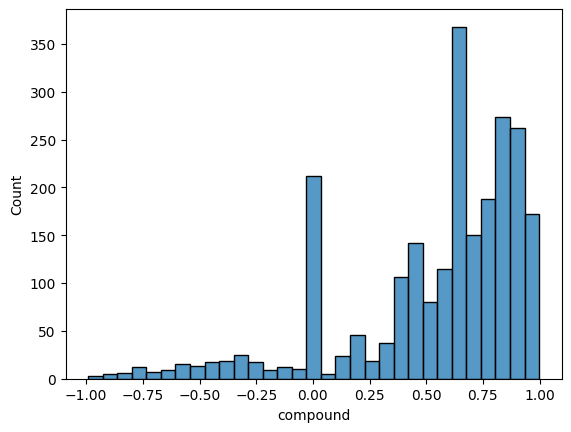

In [ ]:
#plot histogram for compound column to check the distribution
sns.histplot(df_cleaned["compound"])

<Axes: xlabel='negative', ylabel='Count'>

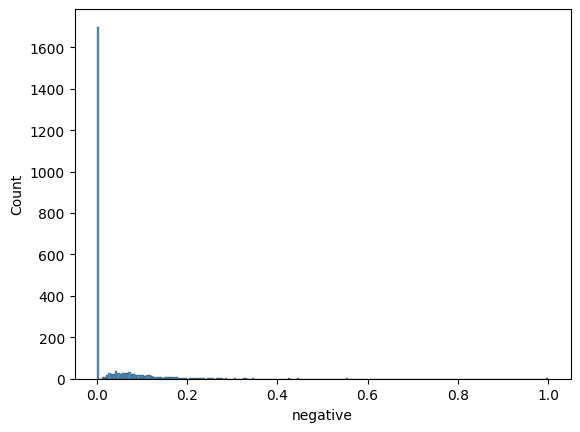

In [ ]:
#plot histogram for negative column to check the distribution
sns.histplot(df_cleaned["negative"])

<Axes: xlabel='positive', ylabel='Count'>

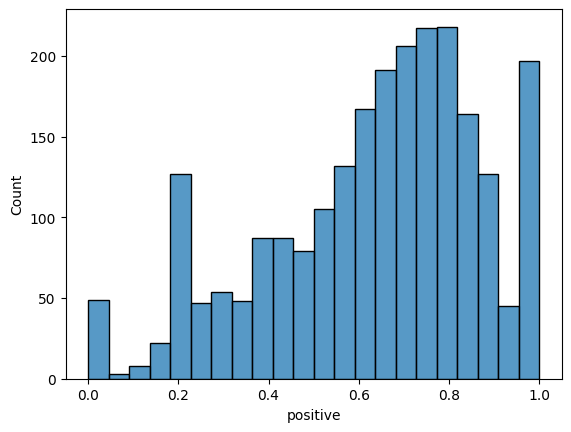

In [ ]:
#plot histogram for positive column to check the distribution
sns.histplot(df_cleaned["positive"])

<Axes: xlabel='neutral', ylabel='Count'>

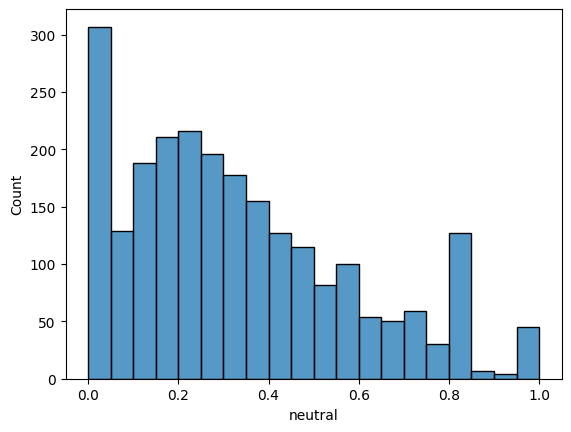

In [ ]:
sns.histplot(df_cleaned["neutral"])

In [ ]:
# Calculate the percentage of negative reviews per item and convert to a DataFrame
percentage_negative = (
    df_cleaned[df_cleaned["compound"] <= 0]  # Filter negative reviews
    .groupby("variation")["compound"]  # Group by the "name" column
    .count() / df_cleaned.groupby("variation")["compound"].count()  # Divide by the total count of reviews per item
    * 100  # Convert to a percentage
).reset_index()  # Convert to a DataFrame

# Rename the column for clarity
percentage_negative.columns = ["variation", "% negative reviews"]

# Sort the results by the percentage of negative reviews
percentage_negative = percentage_negative.sort_values(by="% negative reviews")

# Display the results
percentage_negative

,variation,% negative reviews
7,Heather Gray Fabric,7.894737
5,Charcoal Fabric,10.502283
2,Black Plus,11.877395
14,White Show,12.195122
8,Oak Finish,14.285714
6,Configuration: Fire TV Stick,14.970060
15,White Spot,15.384615
3,Black Show,15.686275
9,Sandstone Fabric,15.909091
11,White,16.091954


In [ ]:
uniq_item = len(df_cleaned["variation"].unique())
uniq_item

16

In [ ]:
# Calculate the percentage of positive reviews per item and convert to a DataFrame
percentage_positive = (
    df_cleaned[df_cleaned["compound"] > 0]  # Filter negative reviews
    .groupby("variation")["compound"]  # Group by the "variation" column
    .count() / df_cleaned.groupby("variation")["compound"].count()  # Divide by the total count of reviews per item
    * 100  # Convert to a percentage
).reset_index()  # Convert to a DataFrame

# Rename the column for clarity
percentage_positive.columns = ["variation", "% positive reviews"]

# Sort the results by the percentage of negative reviews
percentage_positive = percentage_positive.sort_values(by="% positive reviews")

# Display the results
percentage_positive

,variation,% positive reviews
0,Black,74.418605
10,Walnut Finish,80.000000
1,Black Dot,80.971660
13,White Plus,81.578947
4,Black Spot,82.553191
12,White Dot,83.333333
11,White,83.908046
9,Sandstone Fabric,84.090909
3,Black Show,84.313725
15,White Spot,84.615385


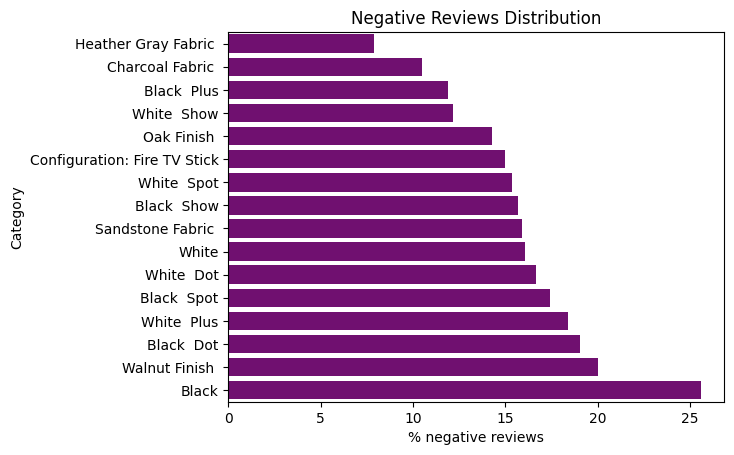

In [ ]:
#plot a horizontal bar plot for the devices with negative reviews
sns.barplot(percentage_negative,
            x="% negative reviews",
            y = percentage_negative["variation"],
            color="purple")

plt.xlabel("% negative reviews")
plt.ylabel("Category")
plt.title("Negative Reviews Distribution")

plt.show()

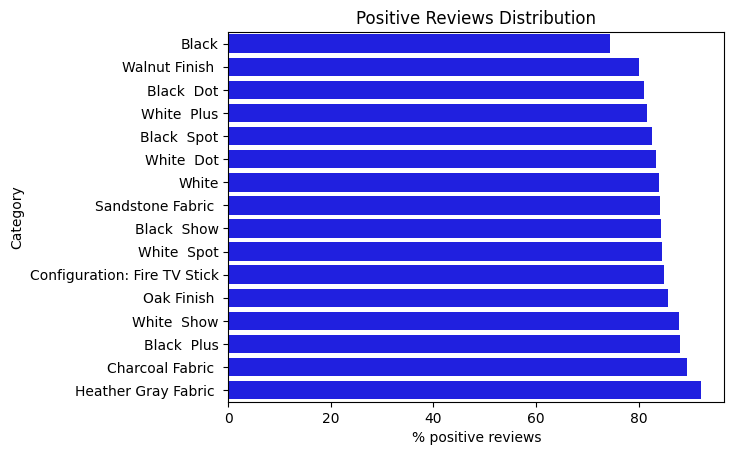

In [ ]:
#plot a horizontal bar plot for the devices with positive reviews
sns.barplot(percentage_positive,
            x="% positive reviews",
            y = percentage_positive["variation"],
            color="blue")

plt.xlabel("% positive reviews")
plt.ylabel("Category")
plt.title("Positive Reviews Distribution")

plt.show()

# Using wordcloud to visualise the device that has more comment

In [ ]:
#apply the processed function for text mining
df_cleaned["processed_review"] = df_cleaned["verified_reviews"].apply(preprocess_text)

df_cleaned.head()


,rating,date,variation,verified_reviews,feedback,compound,negative,positive,neutral,processed_review
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,0.6696,0.000,0.308,0.692,"[love, echo]"
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,0.6360,0.000,0.193,0.807,[loved]
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,-0.1280,0.102,0.784,0.114,"[sometimes, playing, game, answer, question, c..."
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,0.9169,0.000,0.617,0.383,"[lot, fun, thing, 4, yr, old, learns, dinosaur..."
4,5,31-Jul-18,Charcoal Fabric,Music,1,0.0000,0.000,1.000,0.000,[music]


In [ ]:
#view the positive comment for "Heather Gray Fabric"
positive_reviews_device = df_cleaned.loc[
    (df_cleaned["variation"] == "Heather Gray Fabric ") &
    (df_cleaned["compound"] > 0),
    ["processed_review"]
]
positive_reviews_device


,processed_review
5,"[received, echo, gift, needed, another, blueto..."
8,"[look, great]"
9,"[love, listened, song, heard, since, childhood..."
15,"[love, wife, hate]"
16,"[really, happy, purchase, great, speaker, easy..."
...,...
327,"[great, product, set, easy, sound, wonderful]"
332,"[like, type, fun, music]"
333,"[like, volume, top, turn, quickly]"
335,"[love, new, echo, give, hour, music, help, thi..."


In [ ]:
#view negative comment for "Black"
negative_reviews_device = df_cleaned.loc[
    (df_cleaned["variation"] == "Black") &
    (df_cleaned["compound"] <= 0),
    ["processed_review"]
]
negative_reviews_device

,processed_review
346,"[item, longer, work, 5, month, use, connect, w..."
349,"[one's, going, kitchen, timer, music, duty]"
354,[loud]
357,"[thing, barely, work, select, 3rd, party, apps..."
365,[working]
...,...
665,"[sent, back, due, crackling, noise, turning, e..."
668,"[work, well, speaker, grand, getting, another,..."
671,"[need, life, plan, time, date, music]"
672,"[seems, trouble, hearing, say, wake, word, des..."


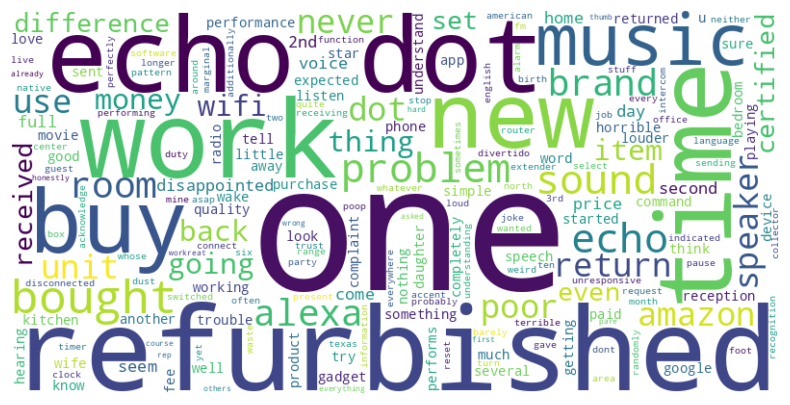

In [ ]:
#generate wordcloud for negative device reviews
from wordcloud import WordCloud

negative_token = [word for review in negative_reviews_device["processed_review"] for word in review]
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_text(" ".join(negative_token))

#display the image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

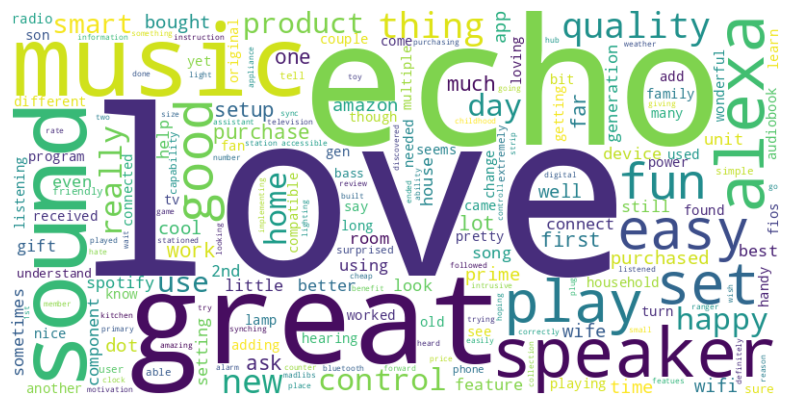

In [ ]:
#generate worldcloud for positive device review
positive_token = [word for review in positive_reviews_device["processed_review"] for word in review]
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_text(" ".join(positive_token))


plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [ ]:
#use nltk FreqDist
from nltk import FreqDist
negative_freq_dist = FreqDist(negative_token)
negative_freq_dist.most_common(10)

[('echo', 19),
 ('dot', 17),
 ('refurbished', 16),
 ('one', 15),
 ('work', 14),
 ('time', 13),
 ('new', 10),
 ('buy', 9),
 ('music', 8),
 ('34', 8)]

In [ ]:
#use nltk FreqDist
from nltk import FreqDist
positive_freq_dist = FreqDist(positive_token)
positive_freq_dist.most_common(10)

[('love', 30),
 ('echo', 21),
 ('great', 20),
 ('music', 19),
 ('sound', 18),
 ('speaker', 16),
 ('alexa', 15),
 ('like', 12),
 ('play', 11),
 ('set', 11)]

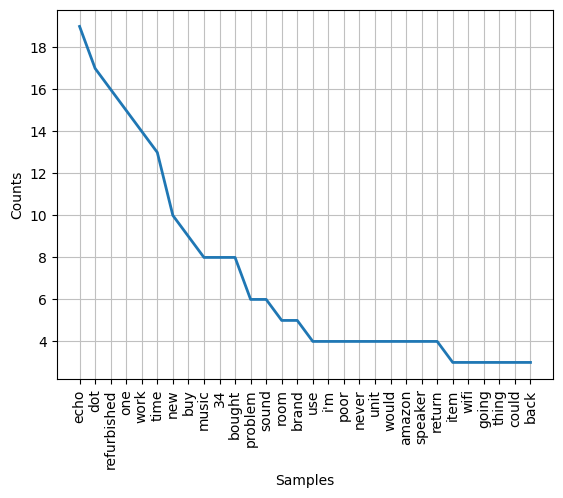

In [ ]:
#plot the negative freqdist graph
negative_freq_dist.plot(30, cumulative=False)
plt.show()

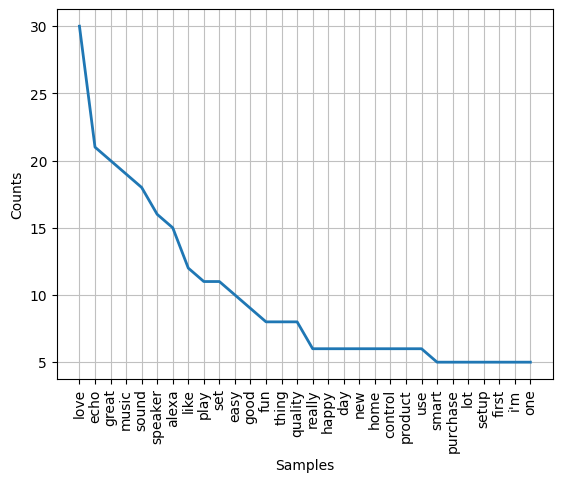

In [ ]:
#plot positive freqdist graph
positive_freq_dist.plot(30, cumulative=False)
plt.show()